Visualizacion de datos-INFB6075-491

Profesor: Diego Alexis Fuentealba

Integrantes:

* Ignacia Quezada Azocar
* Diego Santibañez Oyarce
* Maximiliano Artiaga Tapia

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier

Tratamos con distintos modelos pero el que nos resulto fue el LogisticRegression

In [2]:
df=pd.read_csv('LeagueofLegends.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   League            7620 non-null   object
 1   Year              7620 non-null   int64 
 2   Season            7620 non-null   object
 3   Type              7620 non-null   object
 4   blueTeamTag       7582 non-null   object
 5   bResult           7620 non-null   int64 
 6   rResult           7620 non-null   int64 
 7   redTeamTag        7583 non-null   object
 8   gamelength        7620 non-null   int64 
 9   golddiff          7620 non-null   object
 10  goldblue          7620 non-null   object
 11  bKills            7620 non-null   object
 12  bTowers           7620 non-null   object
 13  bInhibs           7620 non-null   object
 14  bDragons          7620 non-null   object
 15  bBarons           7620 non-null   object
 16  bHeralds          7620 non-null   object
 17  goldred       

In [4]:
#Transformación de las "listas" del dataset a listas reales
df['golddiff'] = df['golddiff'].apply(literal_eval)
df['goldblue'] = df['goldblue'].apply(literal_eval)
df['goldred'] = df['goldred'].apply(literal_eval)

df['bKills'] = df['bKills'].apply(literal_eval)
df['bTowers'] = df['bTowers'].apply(literal_eval)
df['bInhibs'] = df['bInhibs'].apply(literal_eval)
df['bDragons'] = df['bDragons'].apply(literal_eval)
df['bBarons'] = df['bBarons'].apply(literal_eval)
df['bHeralds'] = df['bHeralds'].apply(literal_eval)

df['goldblueTop'] = df['goldblueTop'].apply(literal_eval)
df['goldblueJungle'] = df['goldblueJungle'].apply(literal_eval)
df['goldblueMiddle'] = df['goldblueMiddle'].apply(literal_eval)
df['goldblueADC'] = df['goldblueADC'].apply(literal_eval)
df['goldblueSupport'] = df['goldblueSupport'].apply(literal_eval)
df['blueBans'] = df['blueBans'].apply(literal_eval)

df['rKills'] = df['rKills'].apply(literal_eval)
df['rTowers'] = df['rTowers'].apply(literal_eval)
df['rInhibs'] = df['rInhibs'].apply(literal_eval)
df['rDragons'] = df['rDragons'].apply(literal_eval)
df['rBarons'] = df['rBarons'].apply(literal_eval)
df['rHeralds'] = df['rHeralds'].apply(literal_eval)

df['goldredTop'] = df['goldredTop'].apply(literal_eval)
df['goldredJungle'] = df['goldredJungle'].apply(literal_eval)
df['goldredMiddle'] = df['goldredMiddle'].apply(literal_eval)
df['goldredADC'] = df['goldredADC'].apply(literal_eval)
df['goldredSupport'] = df['goldredSupport'].apply(literal_eval)
df['redBans'] = df['redBans'].apply(literal_eval)

Hasta aca fue lo mismo del trabajo pasado, solo que a continuacion evaluamos que columnas son mas relevantes para nosotros enfocandolo al modelo, debido a que nuestro modelo se quiere enfocar en las condiciones de victoria dejando a los jugadores fuera y con un filtrado en el tiempo ver si gana o no

In [5]:
df.isnull().sum()

League               0
Year                 0
Season               0
Type                 0
blueTeamTag         38
bResult              0
rResult              0
redTeamTag          37
gamelength           0
golddiff             0
goldblue             0
bKills               0
bTowers              0
bInhibs              0
bDragons             0
bBarons              0
bHeralds             0
goldred              0
rKills               0
rTowers              0
rInhibs              0
rDragons             0
rBarons              0
rHeralds             0
blueTop             37
blueTopChamp         0
goldblueTop          0
blueJungle          28
blueJungleChamp      0
goldblueJungle       0
blueMiddle          37
blueMiddleChamp      0
goldblueMiddle       0
blueADC             37
blueADCChamp         0
goldblueADC          0
blueSupport         37
blueSupportChamp     0
goldblueSupport      0
blueBans             0
redTop              37
redTopChamp          0
goldredTop           0
redJungle  

In [6]:
filtro = df['blueTop'] == None
print(df[filtro])

Empty DataFrame
Columns: [League, Year, Season, Type, blueTeamTag, bResult, rResult, redTeamTag, gamelength, golddiff, goldblue, bKills, bTowers, bInhibs, bDragons, bBarons, bHeralds, goldred, rKills, rTowers, rInhibs, rDragons, rBarons, rHeralds, blueTop, blueTopChamp, goldblueTop, blueJungle, blueJungleChamp, goldblueJungle, blueMiddle, blueMiddleChamp, goldblueMiddle, blueADC, blueADCChamp, goldblueADC, blueSupport, blueSupportChamp, goldblueSupport, blueBans, redTop, redTopChamp, goldredTop, redJungle, redJungleChamp, goldredJungle, redMiddle, redMiddleChamp, goldredMiddle, redADC, redADCChamp, goldredADC, redSupport, redSupportChamp, goldredSupport, redBans, Address]
Index: []

[0 rows x 57 columns]


Aca eliminamos las columnas con respecto a los equipos y jugadores

In [7]:
new_df = df.drop(['blueTeamTag', 'redTeamTag','blueTop','blueJungle','blueMiddle','blueADC','blueSupport','redTop','redJungle','redMiddle','redADC','redSupport'], axis=1)
new_df.describe()

,Year,bResult,rResult,gamelength
count,7620.000000,7620.000000,7620.000000,7620.000000
mean,2016.280971,0.544094,0.455906,37.012598
std,0.848200,0.498085,0.498085,7.983238
min,2014.000000,0.000000,0.000000,17.000000
25%,2016.000000,0.000000,0.000000,31.000000
50%,2016.000000,1.000000,0.000000,36.000000
75%,2017.000000,1.000000,1.000000,41.000000
max,2018.000000,1.000000,1.000000,95.000000


Vemos que no tengan datos vacios para continuar con el trabajo

In [8]:
new_df.isnull().sum()

League              0
Year                0
Season              0
Type                0
bResult             0
rResult             0
gamelength          0
golddiff            0
goldblue            0
bKills              0
bTowers             0
bInhibs             0
bDragons            0
bBarons             0
bHeralds            0
goldred             0
rKills              0
rTowers             0
rInhibs             0
rDragons            0
rBarons             0
rHeralds            0
blueTopChamp        0
goldblueTop         0
blueJungleChamp     0
goldblueJungle      0
blueMiddleChamp     0
goldblueMiddle      0
blueADCChamp        0
goldblueADC         0
blueSupportChamp    0
goldblueSupport     0
blueBans            0
redTopChamp         0
goldredTop          0
redJungleChamp      0
goldredJungle       0
redMiddleChamp      0
goldredMiddle       0
redADCChamp         0
goldredADC          0
redSupportChamp     0
goldredSupport      0
redBans             0
Address             0
dtype: int

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   League            7620 non-null   object
 1   Year              7620 non-null   int64 
 2   Season            7620 non-null   object
 3   Type              7620 non-null   object
 4   bResult           7620 non-null   int64 
 5   rResult           7620 non-null   int64 
 6   gamelength        7620 non-null   int64 
 7   golddiff          7620 non-null   object
 8   goldblue          7620 non-null   object
 9   bKills            7620 non-null   object
 10  bTowers           7620 non-null   object
 11  bInhibs           7620 non-null   object
 12  bDragons          7620 non-null   object
 13  bBarons           7620 non-null   object
 14  bHeralds          7620 non-null   object
 15  goldred           7620 non-null   object
 16  rKills            7620 non-null   object
 17  rTowers       

esto se ocupo mas para separar los tipos de datos o que se asocia mas cada columna, con la cual solo utilizamos mas que nada para copiar y pegar y aplicar filtrados por año como fue en este trabajo.

In [10]:
datos_generales=new_df[['League','Year','Season','Type','gamelength','golddiff']]

datos_partida_equipo_azul=new_df[['gamelength','bResult','goldblue','bKills','bTowers','bInhibs','bDragons','bBarons','bHeralds']]
datos_partida_equipo_rojo=new_df[['gamelength','rResult','goldred','rKills','rTowers','rInhibs','rDragons','rBarons','rHeralds']]

datos_jugadores_equipo_azul=new_df[['blueTopChamp','goldblueTop','blueJungleChamp','goldblueJungle','blueMiddleChamp','goldblueMiddle','blueADCChamp','goldblueADC','blueSupportChamp','goldblueSupport','blueBans']]
datos_jugadores_equipo_rojo=new_df[['redTopChamp','goldredTop','redJungleChamp','goldredJungle','redMiddleChamp','goldredMiddle','redADCChamp','goldredADC','redSupportChamp','goldredSupport','redBans']]
oro_equipo_azul1,oro_equipo_rojo1,diferencia_oro1=datos_partida_equipo_azul['goldblue'][0],datos_partida_equipo_rojo['goldred'][0],datos_generales['golddiff'][0]

largo=datos_generales[['gamelength','Year']]
año2015=new_df['Year']==2015
año2015=new_df.loc[año2015]

año2016=new_df['Year']==2016
año2016=new_df.loc[año2016]

año2017=new_df['Year']==2017
año2017=new_df.loc[año2017]

año2018=new_df['Year']==2018
año2018=new_df.loc[año2018]

In [32]:
#Obtener los años únicos en los datos
years = largo['Year'].unique()

#Crear una lista vacía para almacenar los datos de cada año
data = []

#Iterar sobre los años y obtener los datos correspondientes para cada uno
for year in years:
  temp = largo[(largo['Year'] == year)]['gamelength'].value_counts()
  tiempo = temp.index.tolist()
  vtiempo = temp.values.tolist()
  trace = go.Scatter(x=tiempo, y=vtiempo, name=str(year), mode='markers')
  data.append(trace)

#Crear el layout de la figura
layout = go.Layout(
title='Duracion de partidas por año',
xaxis=dict(title='Minutos de partida'),
yaxis=dict(title='Cantidad de partidas con ese tiempo')
)

#Crear la figura y mostrarla
fig = go.Figure(data=data, layout=layout)
fig.show()

El grafico de arriba solo muestra las cantidades de partidas con un cierto minuto de duracion, esto es mas un muestreo de los datos de los cuales trabajaremos ya que evaluaremos en el modelo a partir del minuto 30

In [12]:
# Obtener los años únicos en los datos
years = largo['Year'].unique()

# Crear una lista vacía para almacenar los datos de cada año
data = []

# Iterar sobre los años y obtener los datos correspondientes para cada uno
for year in years:
  temp = largo[(largo['Year'] == year)]['gamelength']
  trace = go.Box(y=temp, name=str(year))
  data.append(trace)

  # Calcular y mostrar la media, valor máximo y valor mínimo de la duración de las partidas para el año actual
  max_val = temp.max()
  mean_val = temp.mean()
  min_val = temp.min()
  print("Año:", year)
  print("Valor máximo:", max_val)
  print("Media:", mean_val)
  print("Valor mínimo:", min_val)
  print("")

# Crear el layout de la figura
layout = go.Layout(
title='Duración de partidas por año',
xaxis=dict(title='Año'),
yaxis=dict(title='Minutos de partida')
)

# Crear la figura y mostrarla
fig = go.Figure(data=data, layout=layout)
fig.update_layout(autosize=False, width=800, height=600)
fig.show()

Año: 2015
Valor máximo: 81
Media: 38.331550802139034
Valor mínimo: 21

Año: 2016
Valor máximo: 81
Media: 37.04009623095429
Valor mínimo: 18

Año: 2017
Valor máximo: 78
Media: 36.358501963153124
Valor mínimo: 17

Año: 2014
Valor máximo: 72
Media: 36.65384615384615
Valor mínimo: 22

Año: 2018
Valor máximo: 95
Media: 37.643153526970956
Valor mínimo: 24



El grafico de arriba muestra la media de cada año junto a su maximo y minimo valor, se pueden ver ciertas irregularidades en el grafico las cuales examinamos a profundidad y no se vera afectado nuestro modelo ya que son casos reales y particulares esos valores, con los cuales no se borraran ya que son importantes para el modelo debido a que no tiene un tiempo tope

In [13]:
filtro = df['gamelength'] == 95
print(df[filtro])

     League  Year  Season    Type blueTeamTag  bResult  rResult redTeamTag  \
7091    LCK  2018  Spring  Season         JAG        1        0        SKT   

      gamelength                                           golddiff  ...  \
7091          95  [0, 0, 102, -188, -325, 42, -5, -5, 398, 749, ...  ...   

     redMiddleChamp                                      goldredMiddle redADC  \
7091       Kassadin  [500, 500, 536, 937, 1229, 1529, 1935, 2279, 2...   Bang   

     redADCChamp                                         goldredADC  \
7091      Ezreal  [500, 500, 584, 1064, 1399, 1750, 2012, 2457, ...   

     redSupport redSupportChamp  \
7091     Effort           Janna   

                                         goldredSupport  \
7091  [500, 500, 538, 749, 964, 1159, 1323, 1491, 17...   

                                         redBans  \
7091  [KogMaw, Caitlyn, Braum, Camille, Nidalee]   

                                                Address  
7091  http://matchhistory.na.le

Este dato no es erroneo, fue una partida real, la cual tuvimos que comprobar si era asi y efectivamente, si es real

Adjuntamos link: https://www.youtube.com/watch?v=HJgIzx2jzsk

In [14]:
def toc(df):
    #Listas auxiliares que se utilizarán para almacenar un valor temporalmente
    aux2=[]
    aux3=[]
    cantidadTotalCampeones=[]
    roles=['Top', 'Jungle', 'Middle', 'ADC', 'Support']
    for i in range(len(roles)):
        rolRed=str('red'+roles[i]+'Champ')
        rolBlue=str('blue'+roles[i]+'Champ')
        #La columna del dataframe se transformó en lista para poder interar en sobre ella ya que daba error si no se realizaba este cambio
        templist=list(df[rolRed])
        templist1=list(df[rolBlue])
        for j in range(len(templist)):
            aux2=templist[j]
            #Se iterará por cada campeón de la lista para añadirlo a otra que contendrá todos los campeones que se usaron durante el año
            cantidadTotalCampeones.append(aux2)
        for k in range(len(templist1)):
            aux3=templist1[k]
            cantidadTotalCampeones.append(aux3)
    return cantidadTotalCampeones
def conteototal(array):
    #La función unique retorna la cantidad de veces que encontró un campeón dentro de todo el array
    campeones, conteo=np.unique(array, return_counts=True)
    conteoIdx=np.argsort(-conteo)
    return campeones[conteoIdx],conteo[conteoIdx]

datos=[]
todosAños=[año2015, año2016, año2017, año2018, año2018]
years15_18=[2015,2016,2017,2018]
for año in todosAños:
    aux4=toc(año)
    temp5, temp6=conteototal(aux4)
    trace=go.Bar(x=temp5, y=temp6)
    datos.append(trace)
layout = go.Layout(
    title='Número de veces que se usó un campeón',
    xaxis=dict(title='Campeones'),
    yaxis=dict(title='N° de veces')


    #updatemenus=[
    #    dict(
    #        type='buttons',
    #        showactive=True,
    #        buttons=[
    #            dict(
    #                label=str(year),
    #                method='update',
    #                args=[{'visible': [year == y for y in years]},
    #                      {'title': 'Número de veces que se usó un campeón en  - {}'.format(year)}]
    #            ) for year in years15_18
    #        ],
    #        direction='right',
    #        x=0.22,
    #        y=1.2
    #    )
    #]
  )

# Crear la figura y mostrarla
fig = go.Figure(data=datos, layout=layout)
fig.show()

A continuacion dividiremos el set de datos con un filtrado de años, esto es debido a que despues del año 2016, que seria 2017 se cambio la cantidad de baneos por lo cual ya no eran 3 sino 5, por eso tomamos la decision de tomar desde el años 2015 y 2016 para ser consecuentes y que no afecte al analisis de los datos.

In [15]:
filtro = df['Year'] == 2015
print(df[filtro])

     League  Year  Season       Type blueTeamTag  bResult  rResult redTeamTag  \
0     NALCS  2015  Spring     Season         TSM        1        0         C9   
1     NALCS  2015  Spring     Season         CST        0        1        DIG   
2     NALCS  2015  Spring     Season         WFX        1        0         GV   
3     NALCS  2015  Spring     Season         TIP        0        1         TL   
4     NALCS  2015  Spring     Season         CLG        1        0         T8   
...     ...   ...     ...        ...         ...      ...      ...        ...   
7417    LCK  2015  Summer  Promotion         SSG        1        0     Xenics   
7418    LCK  2015  Summer  Promotion      Xenics        0        1        SSG   
7419    LCK  2015  Summer  Promotion       Prime        0        1     Xenics   
7420    LCK  2015  Summer  Promotion      Xenics        0        1      Prime   
7421    LCK  2015  Summer  Promotion       Prime        1        0     Xenics   

      gamelength           

In [16]:
filtro = [1 in bans for bans in new_df['redBans']] and (new_df['Year'] == 2015)
print(filtro)

0        True
1        True
2        True
3        True
4        True
        ...  
7615    False
7616    False
7617    False
7618    False
7619    False
Name: Year, Length: 7620, dtype: bool


In [17]:
print(new_df['redBans'])

0                  [Tristana, Leblanc, Nidalee]
1                      [RekSai, Janna, Leblanc]
2                        [Leblanc, Zed, RekSai]
3                      [RekSai, Rumble, LeeSin]
4                       [Rumble, Sivir, Rengar]
                         ...                   
7615       [Ornn, Kalista, Ryze, Alistar, Shen]
7616      [Zoe, KogMaw, JarvanIV, Ornn, Rengar]
7617    [Azir, Kalista, Braum, Maokai, Alistar]
7618     [Kalista, Galio, Gnar, Jayce, Sejuani]
7619     [KogMaw, Illaoi, Azir, Karma, Sejuani]
Name: redBans, Length: 7620, dtype: object


In [18]:
print(new_df['Year'].unique())

[2015 2016 2017 2014 2018]


In [19]:
print(new_df['blueBans'])

0                     [Rumble, Kassadin, Lissandra]
1                      [Kassadin, Sivir, Lissandra]
2                   [JarvanIV, Lissandra, Kassadin]
3                      [Annie, Lissandra, Kassadin]
4                      [Irelia, Pantheon, Kassadin]
                           ...                     
7615     [Ezreal, Sejuani, Azir, Cassiopeia, Corki]
7616          [Gangplank, Sejuani, Azir, Gnar, Zac]
7617    [TahmKench, KogMaw, Shen, Sejuani, Shyvana]
7618         [KogMaw, Illaoi, Urgot, Xerath, Karma]
7619          [Kalista, Gnar, Ryze, Orianna, Sivir]
Name: blueBans, Length: 7620, dtype: object


In [20]:
# Seleccionar las filas que cumplen con la condición
filtro = new_df['Year'] == 2015
df_filtrado = new_df[filtro]

# Seleccionar los valores de 'redBans' como una serie de pandas y mostrarlos
redBans_filtrado = df_filtrado['redBans']
print(redBans_filtrado)

0        [Tristana, Leblanc, Nidalee]
1            [RekSai, Janna, Leblanc]
2              [Leblanc, Zed, RekSai]
3            [RekSai, Rumble, LeeSin]
4             [Rumble, Sivir, Rengar]
                    ...              
7417       [Nidalee, Kalista, RekSai]
7418       [Cassiopeia, Azir, RekSai]
7419         [Kalista, Leblanc, Lulu]
7420    [Cassiopeia, Hecarim, RekSai]
7421       [Leblanc, Kalista, Maokai]
Name: redBans, Length: 1496, dtype: object


In [21]:
# Seleccionar las filas que cumplen con la condición
filtro = new_df['Year'] == 2015
df_filtrado = new_df[filtro]

# Seleccionar los valores de 'redBans' como una serie de pandas y mostrar el primer valor
redBans_filtrado = df_filtrado['redBans']
print(redBans_filtrado.iloc[0])

['Tristana', 'Leblanc', 'Nidalee']


In [22]:
# Seleccionar las filas que cumplen con la condición
filtro = new_df['Year'] == 2015
df_filtrado = new_df[filtro]

# Seleccionar los valores de 'redBans' como una serie de pandas y mostrar el primer valor
redBans_filtrado = df_filtrado['redBans']

# Asignación múltiple para separar los valores en tres variables
valor1, valor2, valor3 = redBans_filtrado.iloc[:3]

# Imprimir los valores separados
print(valor1)
print(valor2)
print(valor3)

['Tristana', 'Leblanc', 'Nidalee']
['RekSai', 'Janna', 'Leblanc']
['Leblanc', 'Zed', 'RekSai']


In [23]:
# Seleccionar las filas que cumplen con la condición
filtro = new_df['Year'] == 2015
df_filtrado = new_df[filtro]

# Seleccionar los valores de 'redBans' como una serie de pandas y mostrar el primer valor
redBans_filtrado = df_filtrado['redBans']

# Asignación múltiple para separa los valores en tres variables
champ1, champ2, champ3 = redBans_filtrado.iloc[0]

# Imprimir los valores separados
print(champ1)
print(champ2)
print(champ3)

Tristana
Leblanc
Nidalee


In [24]:
# Seleccionar las filas que cumplen con la condición
filtro = new_df['Year'] == 2015
df_filtrado = new_df[filtro]

# Seleccionar los valores de 'redBans' como una serie de pandas
redBans_filtrado = df_filtrado['redBans']

# Crear un arreglo para guardar los campeones
campeones = []

# Iterar sobre cada valor de 'redBans'
for redBans in redBans_filtrado:
    try:
        # Asignación múltiple para separar los valores en tres variables
        champ1, champ2, champ3 = redBans

        # Si alguno de los valores es 'null', pasar al siguiente
        if champ1 is None or champ2 is None or champ3 is None:
            continue

        # Agregar los campeones al arreglo
        campeones.append(champ1)
        campeones.append(champ2)
        campeones.append(champ3)

        # Imprimir los valores separados
        print(champ1)
        print(champ2)
        print(champ3)

    except ValueError:
        # Si no hay suficientes valores para asignar a las tres variables, pasar al siguiente
        continue

# Imprimir el arreglo de campeones
print(campeones)

Tristana
Leblanc
Nidalee
RekSai
Janna
Leblanc
Leblanc
Zed
RekSai
RekSai
Rumble
LeeSin
Rumble
Sivir
Rengar
Azir
RekSai
Lissandra
RekSai
Gnar
Kassadin
Nunu
Gnar
RekSai
Rumble
Lissandra
Fizz
RekSai
JarvanIV
Lissandra
RekSai
Lissandra
Kassadin
Nocturne
Sivir
Irelia
Rumble
Kassadin
RekSai
RekSai
Leblanc
Rumble
RekSai
Irelia
Rumble
JarvanIV
Cassiopeia
Lissandra
RekSai
Kassadin
Corki
Kalista
Rumble
Kassadin
Rumble
Kassadin
Lissandra
Irelia
Gnar
Xerath
JarvanIV
Kassadin
Lissandra
Kalista
Rumble
Lissandra
JarvanIV
Lissandra
Ahri
Kalista
Kassadin
Annie
Maokai
Lissandra
Leblanc
Kassadin
Lissandra
Kalista
Ahri
Annie
Kalista
Lissandra
RekSai
Kassadin
Kassadin
JarvanIV
Irelia
Kalista
JarvanIV
Lissandra
Xerath
Maokai
Gnar
Ahri
JarvanIV
Rengar
Ahri
Annie
Kassadin
Irelia
Morgana
Nidalee
Corki
Morgana
Kalista
Morgana
Annie
Gnar
Ahri
LeeSin
Leblanc
Rumble
Morgana
Nidalee
Morgana
Corki
Lissandra
JarvanIV
Ahri
Rumble
Lissandra
Rumble
Morgana
Nidalee
Irelia
Lissandra
Lissandra
Kalista
Rumble
Annie
JarvanIV


In [25]:
# Seleccionar las filas que cumplen con la condición
filtro = new_df['Year'] == 2015
df_filtrado = new_df[filtro]

# Seleccionar los valores de 'redBans' como una serie de pandas
redBans_filtrado = df_filtrado['redBans']

# Crear un diccionario para almacenar la cantidad de veces que aparece cada campeón
suma_campeones = {}

# Iterar sobre cada valor de 'redBans'
for redBans in redBans_filtrado:
    try:
        # Asignación múltiple para separar los valores en tres variables
        champ1, champ2, champ3 = redBans

        # Si alguno de los valores es 'null', pasar al siguiente
        if champ1 is None or champ2 is None or champ3 is None:
            continue

        # Agregar los campeones al arreglo
        campeones.append(champ1)
        campeones.append(champ2)
        campeones.append(champ3)

        # Incrementar la cantidad de veces que aparece cada campeón en el diccionario
        if champ1 in suma_campeones:
            suma_campeones[champ1] += 1
        else:
            suma_campeones[champ1] = 1

        if champ2 in suma_campeones:
            suma_campeones[champ2] += 1
        else:
            suma_campeones[champ2] = 1

        if champ3 in suma_campeones:
            suma_campeones[champ3] += 1
        else:
            suma_campeones[champ3] = 1

    except ValueError:
        # Si no hay suficientes valores para asignar a las tres variables, pasar al siguiente
        continue

# Imprimir el diccionario de campeones y sus cantidades
print(suma_campeones)

{'Tristana': 13, 'Leblanc': 217, 'Nidalee': 121, 'RekSai': 220, 'Janna': 46, 'Zed': 104, 'Rumble': 144, 'LeeSin': 48, 'Sivir': 97, 'Rengar': 23, 'Azir': 206, 'Lissandra': 96, 'Gnar': 105, 'Kassadin': 92, 'Nunu': 16, 'Fizz': 70, 'JarvanIV': 56, 'Nocturne': 1, 'Irelia': 55, 'Cassiopeia': 101, 'Corki': 19, 'Kalista': 475, 'Xerath': 41, 'Ahri': 65, 'Annie': 49, 'Maokai': 103, 'Morgana': 86, 'Veigar': 28, 'Vi': 9, 'Hecarim': 87, 'Kennen': 10, 'Nami': 1, 'Lulu': 139, 'Karthus': 5, 'Leona': 7, 'Vladimir': 20, 'Urgot': 61, 'Gragas': 133, 'Sejuani': 46, 'Sion': 7, 'Orianna': 15, 'Alistar': 102, 'Ashe': 8, 'KogMaw': 27, 'Evelynn': 21, 'Bard': 17, 'Yasuo': 12, 'Ryze': 299, 'Thresh': 69, 'TwistedFate': 30, 'Ekko': 16, 'Viktor': 47, 'Ezreal': 17, 'Diana': 11, 'Shen': 31, 'Nautilus': 10, 'Braum': 8, 'Elise': 38, 'Olaf': 8, 'Shyvana': 9, 'Soraka': 5, 'Gangplank': 86, 'Graves': 12, 'Renekton': 3, 'Jax': 21, 'Draven': 12, 'Blitzcrank': 1, 'Chogath': 7, 'Varus': 25, 'Lucian': 10, 'Jayce': 34, 'Riven': 4

Todo esto desde aqui para arriba fue para obtener la cantidad de veces que se a baneado un cierto campeon y llevarlo a algo mas amigable que un arreglo por fila, el trabajo fue separar ese arreglo y guardarlo en otro de manera lineal, practicamente un vector, el cual permitio un manejo de estos datos muy facil y ademas de entendible para todos.

In [26]:
import plotly.graph_objects as go

# Seleccionar los valores de 'redBans' como una serie de pandas para los años 2015 y 2016
redBans_filtrado_2015 = new_df[new_df['Year'] == 2015]['redBans']
redBans_filtrado_2016 = new_df[new_df['Year'] == 2016]['redBans']

# Crear un diccionario para almacenar la cantidad de veces que aparece cada campeón en cada año
suma_campeones_2015 = {}
suma_campeones_2016 = {}

# Iterar sobre cada valor de 'redBans' para el año 2015
for redBans in redBans_filtrado_2015:
    try:
        # Asignación múltiple para separar los valores en tres variables
        champ1, champ2, champ3 = redBans

        # Si alguno de los valores es 'null', pasar al siguiente
        if champ1 is None or champ2 is None or champ3 is None:
            continue

        # Incrementar la cantidad de veces que aparece cada campeón en el diccionario correspondiente
        if champ1 in suma_campeones_2015:
            suma_campeones_2015[champ1] += 1
        else:
            suma_campeones_2015[champ1] = 1

        if champ2 in suma_campeones_2015:
            suma_campeones_2015[champ2] += 1
        else:
            suma_campeones_2015[champ2] = 1

        if champ3 in suma_campeones_2015:
            suma_campeones_2015[champ3] += 1
        else:
            suma_campeones_2015[champ3] = 1

    except ValueError:
        # Si no hay suficientes valores para asignar a las tres variables, pasar al siguiente
        continue

# Iterar sobre cada valor de 'redBans' para el año 2016
for redBans in redBans_filtrado_2016:
    try:
        # Asignación múltiple para separar los valores en tres variables
        champ1, champ2, champ3 = redBans

        # Si alguno de los valores es 'null', pasar al siguiente
        if champ1 is None or champ2 is None or champ3 is None:
            continue

        # Incrementar la cantidad de veces que aparece cada campeón en el diccionario correspondiente
        if champ1 in suma_campeones_2016:
            suma_campeones_2016[champ1] += 1
        else:
            suma_campeones_2016[champ1] = 1

        if champ2 in suma_campeones_2016:
            suma_campeones_2016[champ2] += 1
        else:
            suma_campeones_2016[champ2] = 1

        if champ3 in suma_campeones_2016:
            suma_campeones_2016[champ3] += 1
        else:
            suma_campeones_2016[champ3] = 1

    except ValueError:
        # Si no hay suficientes valores para asignar a las tres variables, pasar al siguiente
        continue

# Crear una figura de tipo Bar con los datos del año 2015
fig = go.Figure(go.Bar(x=list(suma_campeones_2015.keys()), y=list(suma_campeones_2015.values())))

# Actualizar el diseño y el título de la figura
fig.update_layout(title='Cantidad de veces se usa cada campeón en 2015')

# Crear un objeto de tipo Dropdown con las opciones de años
dropdown_años = {
    'type': 'dropdown',
    'buttons': [{'label': '2015', 'method': 'update', 'args': [{'x': [list(suma_campeones_2015.keys())], 'y': [list(suma_campeones_2015.values())]}, {'title': 'Cantidad de veces que aparece cada campeón en 2015'}]},
                {'label': '2016', 'method': 'update', 'args': [{'x': [list(suma_campeones_2016.keys())], 'y': [list(suma_campeones_2016.values())]}, {'title': 'Cantidad de veces que aparece cada campeón en 2016'}]}],
    'direction': 'down',
    'showactive': True,
   'active': 0,
}

# Agregar el botón de Dropdown a la figura
fig.update_layout(updatemenus=[dropdown_años])

# Mostrar la figura
fig.show()

In [27]:
data = pd.DataFrame()

# Establecer un límite
df = df[df.gamelength > 31]
filtro_min = 30

# Analizar solamente los objetivos que ocurrieron antes de los 30 minutos
# Se puede crear un nuevo dataframe (una serie, básicamente) y eliminar todos los objetivos capturados después de la hora de corte

def objectives_before(column: pd.Series, length: float):

    column = column.to_list()
    wanted_objs = []
    for i, game in enumerate(column):
        wanted_objs.append([])
        for obj in game:
            if obj[0] < length:
                wanted_objs[i].append(obj)

    return wanted_objs


# Aplicar una función a las columnas de tipo lista para obtener los objetivos antes de la hora de corte
data = df.assign(blue_kills=lambda x: objectives_before(df['bKills'], filtro_min),
                red_kills=lambda x: objectives_before(df['rKills'], filtro_min),
                blue_towers=lambda x: objectives_before(df['bTowers'], filtro_min),
                red_towers=lambda x: objectives_before(df['rTowers'], filtro_min),
                blue_inhibs=lambda x: objectives_before(df['bInhibs'], filtro_min),
                red_inhibs=lambda x: objectives_before(df['rInhibs'], filtro_min),
                blue_dragons=lambda x: objectives_before(df['bDragons'], filtro_min),
                red_dragons=lambda x: objectives_before(df['rDragons'], filtro_min),
                blue_barons=lambda x: objectives_before(df['bBarons'], filtro_min),
                red_barons=lambda x: objectives_before(df['rBarons'], filtro_min),
                blue_heralds=lambda x: objectives_before(df['bHeralds'], filtro_min),
                red_heralds=lambda x: objectives_before(df['rHeralds'], filtro_min))


data['red_kills'] = data['red_kills'].apply(len)
data['red_towers'] = data['red_towers'].apply(len)
data['red_inhibs'] = data['red_inhibs'].apply(len)
data['red_dragons'] = data['red_dragons'].apply(len)
data['red_barons'] = data['red_barons'].apply(len)
data['red_heralds'] = data['red_heralds'].apply(len)

data['blue_kills'] = data['blue_kills'].apply(len)
data['blue_towers'] = data['blue_towers'].apply(len)
data['blue_inhibs'] = data['blue_inhibs'].apply(len)
data['blue_dragons'] = data['blue_dragons'].apply(len)
data['blue_barons'] = data['blue_barons'].apply(len)
data['blue_heralds'] = data['blue_heralds'].apply(len)

data['blue_tag'] = df['blueTeamTag']
data['blue_result'] = df['bResult']
data['blue_end_gold'] = df['goldblue'].apply(lambda x:x[filtro_min-1])
data['red_tag'] = df['redTeamTag']
data['red_result'] = df['rResult']
data['red_end_gold'] = df['goldred'].apply(lambda x:x[filtro_min-1])

# Generar una columna binaria de victoria
data['winner'] = np.where(data['blue_result'] == 1, 1, 2)
print(data.columns)
display(data.head(17))
display(data[['blue_tag', 'blue_result','blue_kills', 'blue_towers', "blue_inhibs", "blue_dragons", 'blue_heralds',
              'red_tag', 'red_result','red_kills', 'red_towers', "red_inhibs", "red_dragons", 'red_heralds',
              'winner']])

Index(['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult',
       'redTeamTag', 'gamelength', 'golddiff', 'goldblue', 'bKills', 'bTowers',
       'bInhibs', 'bDragons', 'bBarons', 'bHeralds', 'goldred', 'rKills',
       'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds', 'blueTop',
       'blueTopChamp', 'goldblueTop', 'blueJungle', 'blueJungleChamp',
       'goldblueJungle', 'blueMiddle', 'blueMiddleChamp', 'goldblueMiddle',
       'blueADC', 'blueADCChamp', 'goldblueADC', 'blueSupport',
       'blueSupportChamp', 'goldblueSupport', 'blueBans', 'redTop',
       'redTopChamp', 'goldredTop', 'redJungle', 'redJungleChamp',
       'goldredJungle', 'redMiddle', 'redMiddleChamp', 'goldredMiddle',
       'redADC', 'redADCChamp', 'goldredADC', 'redSupport', 'redSupportChamp',
       'goldredSupport', 'redBans', 'Address', 'blue_kills', 'red_kills',
       'blue_towers', 'red_towers', 'blue_inhibs', 'red_inhibs',
       'blue_dragons', 'red_dragons', 'blue_barons', 'r

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,red_barons,blue_heralds,red_heralds,blue_tag,blue_result,blue_end_gold,red_tag,red_result,red_end_gold,winner
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,1,0,0,TSM,1,45845,C9,0,41126,1
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,0,0,0,CST,0,43767,DIG,1,41336,2
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,0,0,0,WFX,1,49255,GV,0,42208,1
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,0,0,0,TIP,0,41672,TL,1,42829,2
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,0,0,0,CLG,1,46935,T8,0,41814,1
6,NALCS,2015,Spring,Season,CST,1,0,WFX,39,"[0, 13, -7, 6, -353, -215, -795, -764, 369, 35...",...,0,0,0,CST,1,52216,WFX,0,41748,1
7,NALCS,2015,Spring,Season,TL,1,0,CLG,43,"[0, 0, 26, 91, -109, 264, 178, 66, -65, 206, 5...",...,0,0,0,TL,1,45726,CLG,0,41285,1
8,NALCS,2015,Spring,Season,C9,0,1,GV,41,"[0, -10, 0, 162, -269, -63, 323, 225, 274, 624...",...,0,0,0,C9,0,47762,GV,1,47463,2
9,NALCS,2015,Spring,Season,T8,1,0,TSM,32,"[0, 0, 0, 68, 498, 210, 283, 311, 133, 291, 32...",...,0,0,0,T8,1,49603,TSM,0,43828,1
10,NALCS,2015,Spring,Season,GV,1,0,DIG,52,"[0, -10, -15, -274, -154, -49, 134, 122, 391, ...",...,0,0,0,GV,1,44944,DIG,0,38746,1


,blue_tag,blue_result,blue_kills,blue_towers,blue_inhibs,blue_dragons,blue_heralds,red_tag,red_result,red_kills,red_towers,red_inhibs,red_dragons,red_heralds,winner
0,TSM,1,9,6,1,0,0,C9,0,5,3,0,2,0,1
1,CST,0,8,5,0,2,0,DIG,1,7,5,0,1,0,2
2,WFX,1,15,6,0,2,0,GV,0,7,1,0,0,0,1
3,TIP,0,7,3,0,0,0,TL,1,13,4,0,3,0,2
4,CLG,1,14,4,0,1,0,T8,0,9,3,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,AUR,0,3,0,0,0,1,RBE,1,7,3,0,3,0,2
7615,YC,0,7,4,0,0,0,SUP,1,12,5,0,3,0,2
7616,GAL,0,7,4,0,2,0,DP,1,12,6,0,1,1,2
7618,LGC,1,10,6,0,3,0,TTC,0,2,2,0,0,0,1


<Axes: >

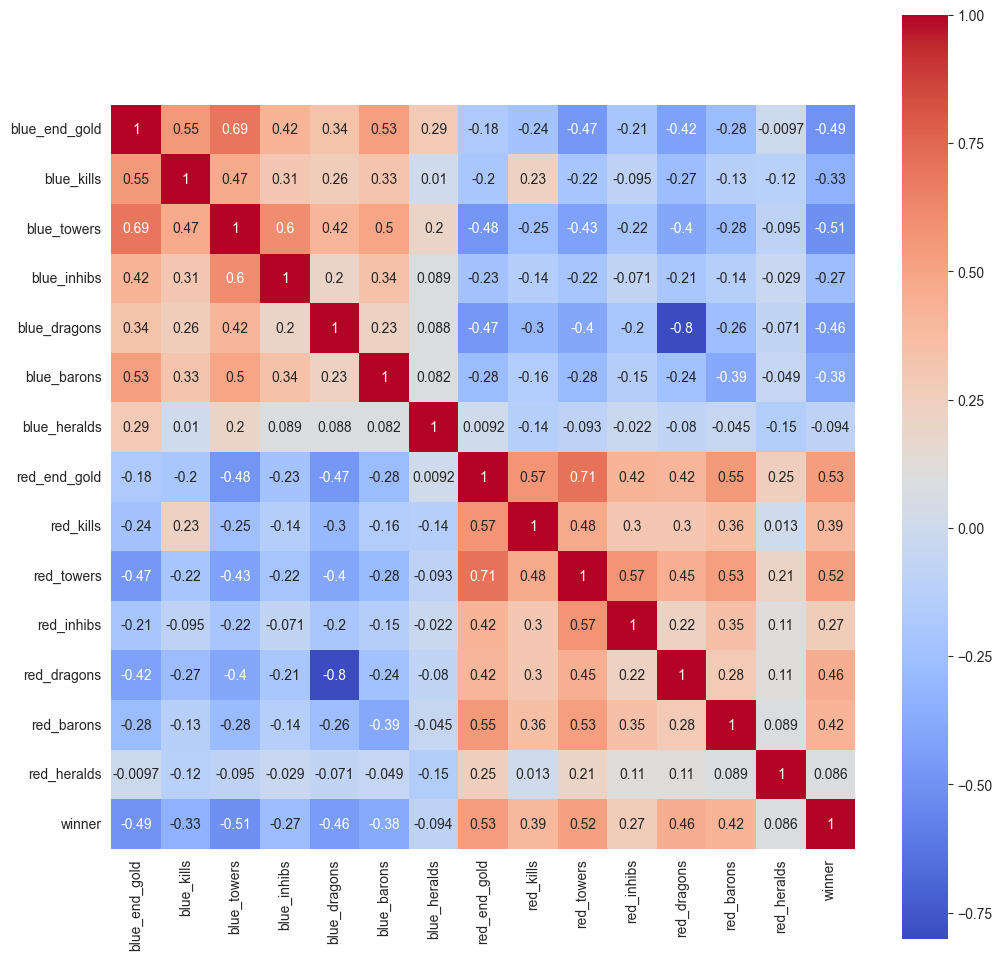

In [28]:
fig = plt.figure(figsize=(12,12))

sns.set_style('darkgrid')
sns.heatmap(data[['blue_end_gold','blue_kills', 'blue_towers', 'blue_inhibs', 'blue_dragons', 'blue_barons', 'blue_heralds', 'red_end_gold','red_kills','red_towers','red_inhibs', 'red_dragons', 'red_barons', 'red_heralds', 'winner']].corr(), annot=True, square=True, cmap='coolwarm')

Esta matriz de correlacion muestra que datos estan mas relacionados con la victoria, esta orientada mas al modelo al cual vamos a implementar.

* Torres Destruidas: ~0.52 (Correlacion moderada)
* Oro Ganado: ~.50 (Correlacion moderada)
* Dragones muertos: 0.46 (Correlacion moderada)
* Barones muertos: 0.40 (Correlacion moderada)
* Muertes: ~0.36 (Correlacion baja)
* Dstruccion de inhibidores: 0.27 (Correlacion baja)
* Heraldos muertos: 0.09 (Correlacion baja)

In [29]:
X = data[['blue_kills', 'blue_towers', 'blue_inhibs', 'blue_dragons', 'blue_barons', 'blue_heralds',
          'red_kills','red_towers','red_inhibs', 'red_dragons', 'red_barons', 'red_heralds']]
X = data[['blue_kills', 'blue_towers', 'blue_inhibs', 'blue_dragons', 'blue_barons', 'blue_heralds',
          'red_kills','red_towers','red_inhibs', 'red_dragons', 'red_barons', 'red_heralds']]
y = data['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
#Este es el peso de las variables X con respecto a y
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)
weight = logmodel.coef_
print(weight)

[[-0.15141779 -0.29079489 -0.00950946 -0.39035047 -0.46767956  0.03711625
   0.16988406  0.30468935  0.02484257  0.13186255  0.68343295 -0.11014486]]


Resporte de Classificacion : 
               precision    recall  f1-score   support

           1       0.82      0.84      0.83       976
           2       0.82      0.79      0.81       880

    accuracy                           0.82      1856
   macro avg       0.82      0.82      0.82      1856
weighted avg       0.82      0.82      0.82      1856

Precision de Regresion Logistica: 81.95%


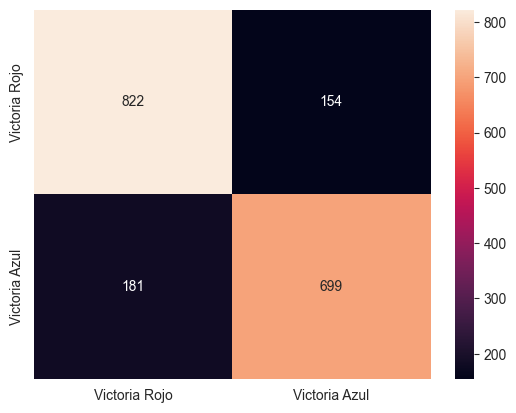

In [31]:
cr = classification_report(y_test, predictions)
print('Resporte de Classificacion : \n', cr)

acc = round(logmodel.score(X_test, y_test) * 100, 2)
print("Precision de Regresion Logistica: " + str(acc) + "%")

cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Victoria Rojo', 'Victoria Azul'], yticklabels=['Victoria Rojo', 'Victoria Azul'],);
#